<a href="https://colab.research.google.com/github/thatadi/Fashion-MNIST/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fashion=keras.datasets.fashion_mnist
fashion

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

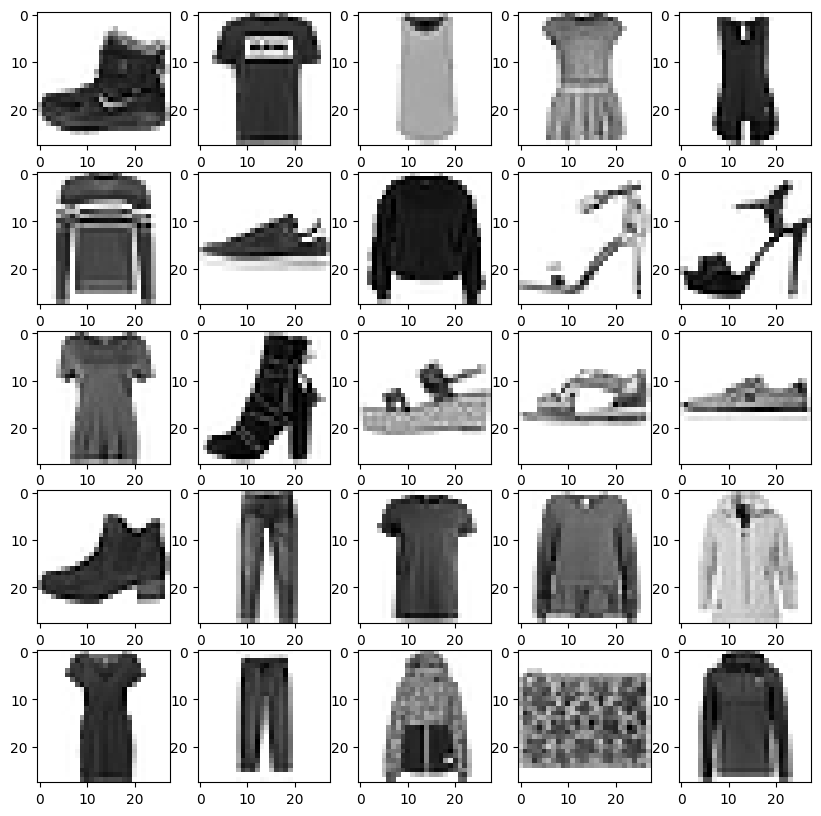

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1);plt.imshow(train_images[i],cmap=plt.cm.binary)


In [ ]:
model=Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(120,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 10)                1210      
                                                                 
Total params: 95410 (372.70 KB)
Trainable params: 95410 (372.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(test_loss,test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.6613 - accuracy: 0.7443
0.6612628698348999 0.7443000078201294


In [ ]:
def label(index):
  options = {
            0: "T-shirt/top",
            1: "Trouser",
            2: "Pullover",
            3: "Dress",
            4: "Coat",
            5: "Sandal",
            6: "Shirt",
            7: "Sneaker",
            8: "Bag",
            9: "Ankleboot",
          }
  return options.get(index, "invalid choice")


In [ ]:
predictions=model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
predictions[5]

array([8.4505178e-04, 9.9808884e-01, 9.8470207e-07, 1.0581547e-03,
       1.8252811e-08, 1.8391972e-19, 6.9414345e-06, 0.0000000e+00,
       1.3689400e-09, 9.6082465e-21], dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
test_labels[5]

1

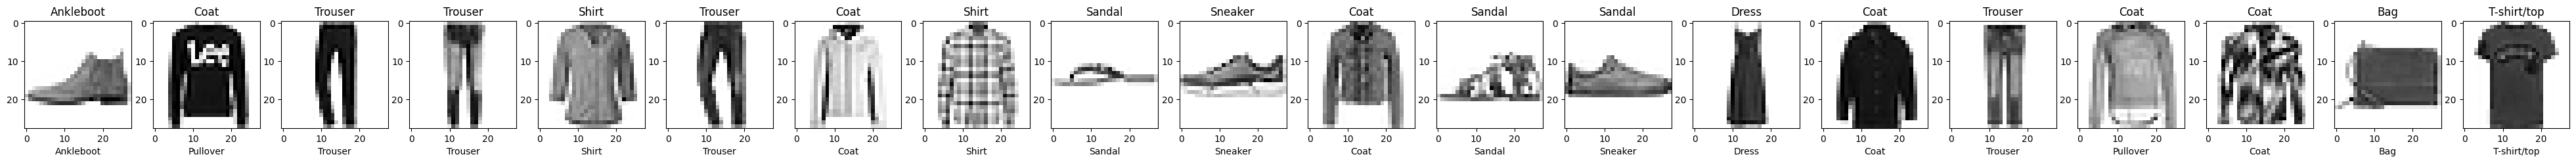

In [ ]:
plt.figure(figsize=(50,50))
for i in range(20):
  plt.subplot(1,20, i+1);plt.imshow(test_images[i],cmap=plt.cm.binary);
  plt.title(label(np.argmax(predictions[i])))
  plt.xlabel(label(test_labels[i]))

